# Coined Model 

In [1]:
import math
import numpy as np
import scipy as sp
import sympy as sy
import networkx
from numpy import linalg as LA
from random import random,randint
import cmath 
from neblina import *
import scipy.special
import time
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
from CoinedModel import *

In [2]:
float_ = 2 #TODO import constants (to avoid surprises case they're changed)
complex_ = 13 #TODO import constants (to avoid surprises case they're changed)
init_engine(0)

In [3]:
num_vert = 201 #1 in the middle and 100 towards each side
adj_mtrx = np.zeros((num_vert, num_vert))

#populates adjacency matrix for line graph (actually circular graph)
for i in range(num_vert):
    adj_mtrx[i, (i-1)%num_vert] = adj_mtrx[i, (i+1)%num_vert] = 1
adj_mtrx

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [4]:
S = ShiftOperator(adj_mtrx)
S.todense()

/home/koruja/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


matrix([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

In [5]:
C = CoinOperator(adj_mtrx, 'hadamard')
#C.todense()

In [6]:
mid_vert = int(np.ceil(num_vert / 2)) - 1
mid_vert

#beware that the coin is 2-sided,
#thus, the initial condition being in the middle vertex,
psi0 = np.zeros(2*num_vert, dtype=complex)
psi0[2*mid_vert] = 1 #pointing towards the right
psi0[2*mid_vert + 1] = complex(0, -1)
psi0 = psi0 / np.sqrt(2)
psi0

array([0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0. 

In [7]:
U = EvolutionOperator_CoinedModel(adj_mtrx, C)
U.todense()

matrix([[ 0.        ,  0.        ,  0.70710678, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.70710678,
          0.        ,  0.        ]])

In [8]:
def vec_f_(V):
#    printpsi0("test_vector_sparse_matrix_multiplication_complex")
    n = V.shape[0]
    vec_f = vector_new(n, complex_)
    for i in range(n):
        #TODO: check type
        #below doesnt work because imaginary part = 0
        #vector_set(vec_f, i, V[i], 0) 
        vector_set(vec_f, i, V[i].real, V[i].imag)
    return vec_f
        
def smat_f_(M):
#    print("test_vector_sparse_matrix_multiplication_complex")
    n = M.shape[0]

    smat_f = sparse_matrix_new(n, n, complex_)
    
    for i in range(0,n):
        for j in range(0,n):
            if M[i,j] != 0.:
                #TODO: check type
                #below doesnt work because imaginary part = 0
                sparse_matrix_set(smat_f, i, j, M[i,j], 0)

#    sparse_matrix_pack(smat_f)
    return smat_f

start = time.time()
vec_psi0 = vec_f_(psi0)
#smat_S = smat_f_(S)
#smat_C = smat_f_(C)
smat_Uprime = smat_f_(U)
print(time.time() - start)

3.3743512630462646


In [9]:
def test_vector_sparse_matrix_multiplication_complex_S_C(vec_f,smat_f,smat_f2,N):
#    print("test_vector_sparse_matrix_multiplication_complex")
    print(1)
    
    sparse_matrix_pack(smat_f)
    sparse_matrix_pack(smat_f2)
    
    move_vector_device(vec_f)
    move_sparse_matrix_device(smat_f)
    move_sparse_matrix_device(smat_f2)

    res = sparse_matvec_mul(vec_f, smat_f)
    res = sparse_matvec_mul(res, smat_f2)
    
    for i in range(N-1):
        res = sparse_matvec_mul(res, smat_f)
        res = sparse_matvec_mul(res, smat_f2)
    
    print(5)

    out = move_vector_host(res)
    MV = np.matrix([vector_get(out, 2 * i) + vector_get(out, 2 * i + 1)*complex(0,1) for i in range(n) ]).T
    
    
    return MV

In [10]:
def test_vector_sparse_matrix_multiplication_complex_U(vec_f,smat_f,dim_U,N):
#    print("test_vector_sparse_matrix_multiplication_complex")
    #print(1)
    
    sparse_matrix_pack(smat_f)
    
    move_vector_device(vec_f)
    move_sparse_matrix_device(smat_f)

    res = sparse_matvec_mul(vec_f, smat_f)
    
    for i in range(N-1):
        res = sparse_matvec_mul(res, smat_f)
    
    #print(2)

    out = move_vector_host(res)
    MV = np.matrix([vector_get(out,2*i)+vector_get(out,2*i+1)*complex(0,1) for i in range(n)]).T
        
    return MV

In [11]:
#function to compute probability
#TODO: add a generalized version to CoinedModel
def ComputeProb(state): #não usar compute e usar palavras por extenso
    return [np.absolute(state[2*i, 0])**2 + np.absolute(state[2*i+1, 0])**2
         for i in range(num_vert)]

In [12]:
#number of iterations
#for Felix's paper I thought about dividing into three images:
# 1 - probability of initial state
# 2 - probability of "halfway through", e.g. 50 steps
# 3 - final probability, e.g. 100 steps
N = int(np.floor(num_vert/4))

n = U.shape[0]
start = time.time()
halfway_res = test_vector_sparse_matrix_multiplication_complex_U(vec_psi0, smat_Uprime, n, N)
vec_halfway = vec_f_(halfway_res)
final_res = test_vector_sparse_matrix_multiplication_complex_U(vec_halfway, smat_Uprime, n, N)
print(time.time() - start)

0.00847172737121582


In [13]:
#function for plotting probability distribution
def PlotProb(state, title=None):
    prob = ComputeProb(state)
    plt.rcParams["figure.figsize"] = (18,10)
    size = np.floor(num_vert / 2)

    plt.tick_params(length=10, width=1, labelsize=16)
    
    plt.xlabel('Vertex ID', fontsize=18)
    plt.ylabel('Probability', fontsize=18)
    
    if title is not None:
        plt.title(title, fontsize=22)
    
    plt.plot(np.arange(-size, size+1), prob, lw=2)

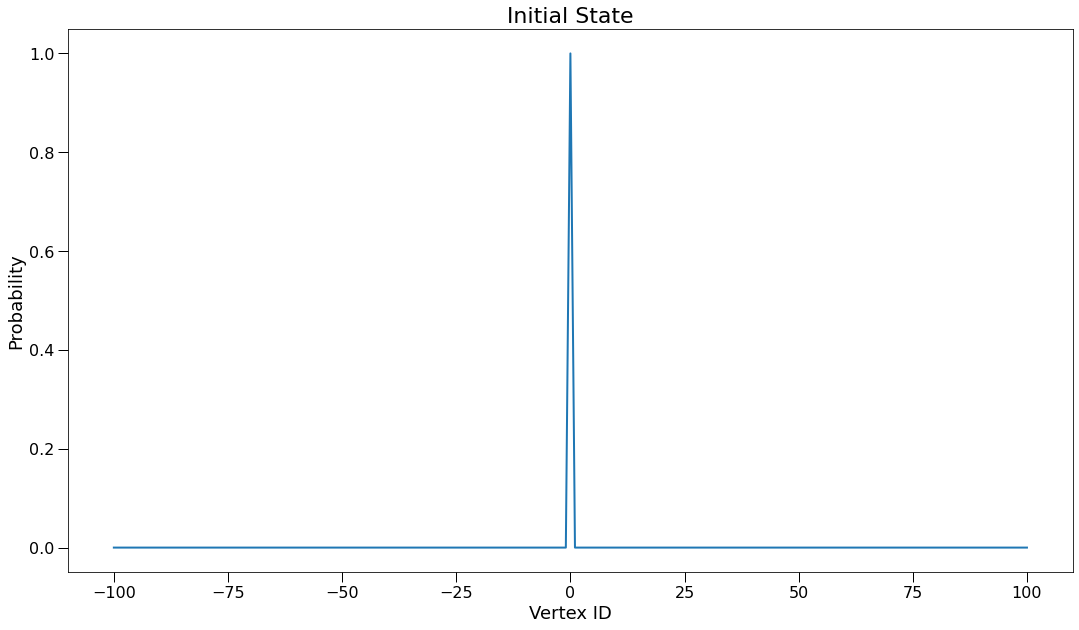

In [14]:
PlotProb(psi0.reshape(len(psi0), 1), "Initial State")

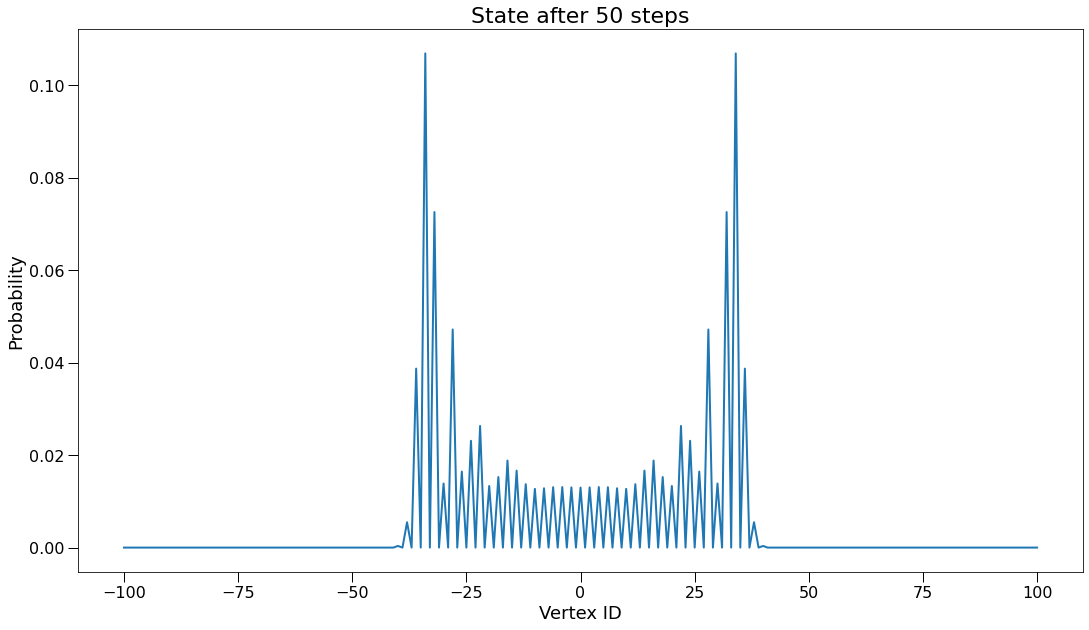

In [15]:
PlotProb(halfway_res, "State after 50 steps")

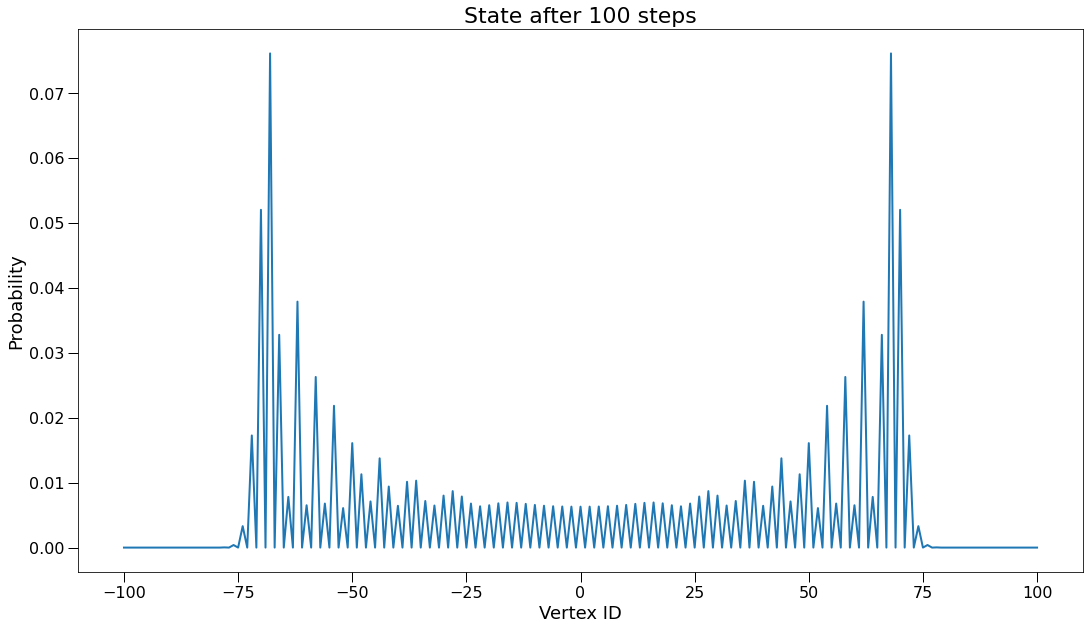

In [16]:
PlotProb(final_res, "State after 100 steps")

In [17]:
# n = Uprime.shape[0]
# serial_Result = np.zeros((n,n))
# start = time.time()
# serial_Result = (Uprime**N)*psi0
# print(time.time() - start)

In [18]:
# print(LA.norm(serial_Result - parallel_Result))

In [19]:
# Uprime.shape

In [20]:
stop_engine()

In [21]:
psi0 = np.zeros(2*num_vert, dtype=complex)
psi0[2*mid_vert - 5] = 1 #pointing towards the right
SD = S.todense()
psi1 = np.squeeze(np.array(SD @ SD @ SD @ psi0))
[i for i in range(len(psi0)) if psi1[i] != 0]

[196]

In [22]:
np.squeeze(np.array(S.todense() @ psi0))

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      